# Date Features


## Features based on dates


In [1]:
import pandas as pd

In [2]:
sunspots = pd.read_csv('../data/sunspots_2014-2016.csv', parse_dates=['date'])
sunspots.head(3)

,date,value
0,2014-01-01,124
1,2014-01-02,133
2,2014-01-03,153


In [3]:
sunspots.tail(3)

,date,value
879,2016-05-29,33
880,2016-05-30,41
881,2016-05-31,36


In [4]:
sunspots["year"] = sunspots["date"].dt.year
sunspots["month"] = sunspots["date"].dt.month
sunspots["day"] = sunspots["date"].dt.day
sunspots["day_of_week"] = sunspots["date"].dt.dayofweek
sunspots["week"] = sunspots["date"].dt.week
sunspots["is_weekend"] = sunspots['day_of_week'] > 5
sunspots["is_month_start"] = sunspots["date"].dt.is_month_start
sunspots["is_month_end"] = sunspots["date"].dt.is_month_end

In [5]:
sunspots.tail()

,date,value,year,month,day,day_of_week,week,is_weekend,is_month_start,is_month_end
877,2016-05-27,34,2016,5,27,4,21,False,False,False
878,2016-05-28,33,2016,5,28,5,21,False,False,False
879,2016-05-29,33,2016,5,29,6,21,True,False,False
880,2016-05-30,41,2016,5,30,0,22,False,False,False
881,2016-05-31,36,2016,5,31,1,22,False,False,True


![image.png](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/11/time-features.png)

## Lag Features

In [6]:
sunspots['lag_1'] = sunspots['value'].shift(1)
sunspots['lag_2'] = sunspots['value'].shift(2)
sunspots['lag_3'] = sunspots['value'].shift(3)
sunspots['lag_4'] = sunspots['value'].shift(4)
sunspots['lag_5'] = sunspots['value'].shift(5)
sunspots['lag_6'] = sunspots['value'].shift(6)
sunspots['lag_7'] = sunspots['value'].shift(7)

In [7]:
sunspots.head()

,date,value,year,month,day,day_of_week,week,is_weekend,is_month_start,is_month_end,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2014-01-01,124,2014,1,1,2,1,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,133,2014,1,2,3,1,False,False,False,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,153,2014,1,3,4,1,False,False,False,133.0,124.0,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,136,2014,1,4,5,1,False,False,False,153.0,133.0,124.0,NaN,NaN,NaN,NaN
4,2014-01-05,134,2014,1,5,6,1,True,False,False,136.0,153.0,133.0,124.0,NaN,NaN,NaN


There is more than one way of determining the lag at which the correlation is significant. For instance, we can use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.

* <b>ACF</b>: The ACF plot is a measure of the correlation between the time series and the lagged version of itself
* <b>PACF</b>: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

For our particular example, here are the ACF and PACF plots:

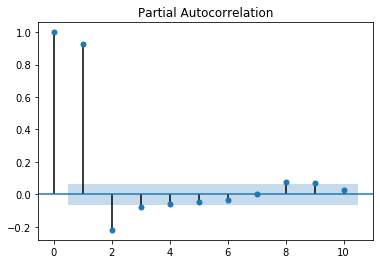

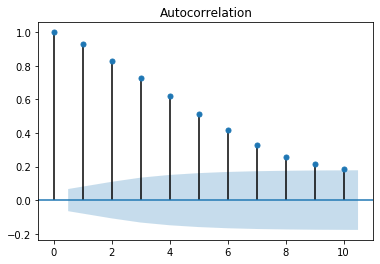

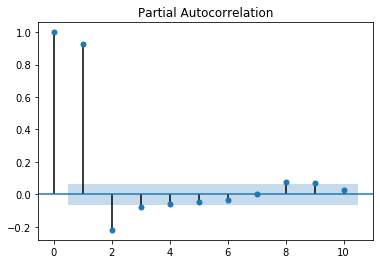

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sunspots['value'], lags=10)
plot_pacf(sunspots['value'], lags=10)

## Absolute and relative differences

In [9]:
sunspots['dif_abs_lag_1'] = sunspots['value'] - sunspots['lag_1']
sunspots['dif_abs_lag_2'] = sunspots['value'] - sunspots['lag_2']

sunspots['dif_rel_lag_1'] = (sunspots['value'] - sunspots['lag_1']) / sunspots['lag_1']
sunspots['dif_rel_lag_2'] = (sunspots['value'] - sunspots['lag_2']) / sunspots['lag_2']

## Rolling features

![image](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/11/3hotmk.gif)

In [10]:
sunspots['rolling_mean'] = sunspots['value'].rolling(window=7).mean()
sunspots['rolling_mean_exp'] = sunspots['value'].rolling(window=7, win_type="exponential").mean(tau=0.6)
sunspots['rolling_median'] = sunspots['value'].rolling(window=7).median()
sunspots['rolling_sum'] = sunspots['value'].rolling(window=7).sum()
sunspots['rolling_max'] = sunspots['value'].rolling(window=7).max()
sunspots['rolling_min'] = sunspots['value'].rolling(window=7).min()
sunspots['rolling_std'] = sunspots['value'].rolling(window=7).std()

In [11]:
sunspots.head(10)

,date,value,year,month,day,day_of_week,week,is_weekend,is_month_start,is_month_end,...,dif_abs_lag_2,dif_rel_lag_1,dif_rel_lag_2,rolling_mean,rolling_mean_exp,rolling_median,rolling_sum,rolling_max,rolling_min,rolling_std
0,2014-01-01,124,2014,1,1,2,1,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,133,2014,1,2,3,1,False,False,False,...,NaN,0.072581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,153,2014,1,3,4,1,False,False,False,...,29.0,0.150376,0.233871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,136,2014,1,4,5,1,False,False,False,...,3.0,-0.111111,0.022556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,134,2014,1,5,6,1,True,False,False,...,-19.0,-0.014706,-0.124183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-06,167,2014,1,6,0,2,False,False,False,...,31.0,0.246269,0.227941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-07,140,2014,1,7,1,2,False,False,False,...,6.0,-0.161677,0.044776,141.000000,138.583185,136.0,987.0,167.0,124.0,14.422205
7,2014-01-08,107,2014,1,8,2,2,False,False,False,...,-60.0,-0.235714,-0.359281,138.571429,139.000655,136.0,970.0,167.0,107.0,18.590832
8,2014-01-09,120,2014,1,9,3,2,False,False,False,...,-20.0,0.121495,-0.142857,136.714286,156.751033,136.0,957.0,167.0,107.0,19.847034
9,2014-01-10,137,2014,1,10,4,2,False,False,False,...,30.0,0.141667,0.280374,134.428571,138.558745,136.0,941.0,167.0,107.0,18.536964


## Holidays

Use default holidays for different contries or [add your own](https://pypi.org/project/holidays/).

In [12]:
import holidays
from datetime import date

In [13]:
date(2016, 8, 24) in holidays.Ukraine()

True

In [14]:
sunspots["is_holiday"] = sunspots["date"].apply(lambda x: x in holidays.Ukraine())

In [15]:
sunspots.head(8)

,date,value,year,month,day,day_of_week,week,is_weekend,is_month_start,is_month_end,...,dif_rel_lag_1,dif_rel_lag_2,rolling_mean,rolling_mean_exp,rolling_median,rolling_sum,rolling_max,rolling_min,rolling_std,is_holiday
0,2014-01-01,124,2014,1,1,2,1,False,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2014-01-02,133,2014,1,2,3,1,False,False,False,...,0.072581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2014-01-03,153,2014,1,3,4,1,False,False,False,...,0.150376,0.233871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2014-01-04,136,2014,1,4,5,1,False,False,False,...,-0.111111,0.022556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2014-01-05,134,2014,1,5,6,1,True,False,False,...,-0.014706,-0.124183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,2014-01-06,167,2014,1,6,0,2,False,False,False,...,0.246269,0.227941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,2014-01-07,140,2014,1,7,1,2,False,False,False,...,-0.161677,0.044776,141.000000,138.583185,136.0,987.0,167.0,124.0,14.422205,True
7,2014-01-08,107,2014,1,8,2,2,False,False,False,...,-0.235714,-0.359281,138.571429,139.000655,136.0,970.0,167.0,107.0,18.590832,False


## Automatic feature generation

[TSFRESH](https://github.com/blue-yonder/tsfresh) can generate timeseries feature automaticaly.
Check more examples [here](https://github.com/blue-yonder/tsfresh/tree/master/notebooks).

In [21]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

In [43]:
x = pd.Series(data=sunspots["value"].values, index=sunspots["date"].values)

In [45]:
df_shift, y = make_forecasting_frame(x, kind="price", max_timeshift=10, rolling_direction=1)

In [47]:
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="value", impute_function=impute, 
                     show_warnings=False)

Feature Extraction: 100%|██████████| 30/30 [00:07<00:00,  3.99it/s]
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'value__agg_linear_tre

In [56]:
X.head()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""__maxlag_40","value__agg_autocorrelation__f_agg_""median""__maxlag_40","value__agg_autocorrelation__f_agg_""var""__maxlag_40","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__symmetry_looking__r_0.9,value__symmetry_looking__r_0.9500000000000001,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-1,value__value_count__value_0,value__value_count__value_1,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2014-01-02,15376.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2014-01-03,33065.0,9.0,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.250000,1.0
2014-01-04,56474.0,29.0,-0.727118,-0.727118,0.464243,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1068389.0,0.0,0.0,0.0,0.0,0.0,146.888889,1.0
2014-01-05,74970.0,46.0,-0.312673,-0.067271,0.191529,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,595930.0,0.0,0.0,0.0,0.0,0.0,110.250000,1.0
2014-01-06,92926.0,48.0,-0.157184,-0.004204,0.191868,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,150084.0,394740.0,0.0,0.0,0.0,0.0,89.200000,1.0
